In [23]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

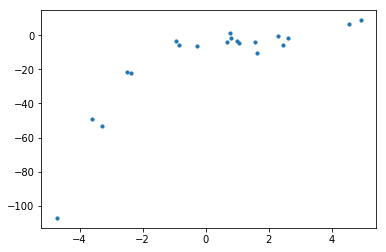

In [24]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.scatter(x,y, s=10)
plt.show()

In [25]:
# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

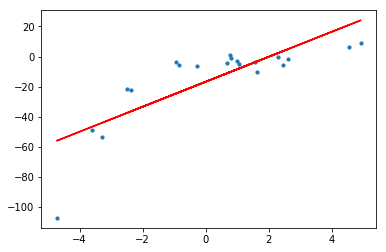

In [26]:
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()

# We can see that the straight line is unable to capture the patterns in the data. 
# This is an example of under-fitting. Computing the RMSE and R²-score of the linear line gives:
# RMSE of linear regression is 15.908242501429998.
# R2 score of linear regression is 0.6386750054827146

In [27]:
# To overcome under-fitting, we need to increase the complexity of the model.
# To generate a higher order equation we can add powers of the original features as new features. The linear model,

# Y = theta0 + theta1X  ---->  Y = theta0 + theta1X + theta2X(Square)

In [41]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

In [36]:
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

In [37]:
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

23.188985407100322
0.23225482806073827


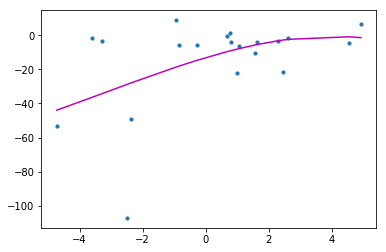

In [42]:
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()